<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/Niloy_Research_Code_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0



--2021-05-14 03:58:06--  https://www.dropbox.com/sh/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda [following]
--2021-05-14 03:58:06--  https://www.dropbox.com/sh/raw/u9q6bnc6trh9h0k/AADEmpop2CjJymIZ3QXkELpda
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2021-05-14 03:58:07 ERROR 404: Not Found.



In [ ]:
!unzip AADEmpop2CjJymIZ3QXkELpda?dl=0


unzip:  cannot find or open AADEmpop2CjJymIZ3QXkELpda?dl=0, AADEmpop2CjJymIZ3QXkELpda?dl=0.zip or AADEmpop2CjJymIZ3QXkELpda?dl=0.ZIP.

No zipfiles found.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import tensorflow_hub as hub
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import tensorboard

X_train_path = "/content/drive/MyDrive/Research/v1_0/Train"
X_test_path = "/content/drive/MyDrive/Research/v1_0/Test"
Val_test_path = "/content/drive/MyDrive/Research/v1_0/Val"

# design the traing dataset
train_datagen = image.ImageDataGenerator(
    rescale=1/255,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)

X_train = train_datagen.flow_from_directory(
    X_train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode = "categorical"
)

# design the test dataset
test_datagen = image.ImageDataGenerator(rescale=1/255)

X_test = test_datagen.flow_from_directory(
    X_test_path,
    target_size=(224, 224),
    batch_size=1,
    class_mode= "categorical"
)

# design the test dataset
Val_datagen = image.ImageDataGenerator(rescale=1/255)

Val_test = test_datagen.flow_from_directory(
    Val_test_path,
    target_size=(224, 224),
    batch_size=1,
    class_mode= "categorical"
)

# print(X_train.samples)
# y_train = X_train.classes
# y_test = X_test.classes


Found 8376 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.


***ResNet152V***

234700800/234698864 [==============================] - 2s 0us/step
Epoch 1/5
262/262 [==============================] - 2609s 10s/step - loss: 0.9743 - accuracy: 0.5221 - val_loss: 0.8173 - val_accuracy: 0.6100
Epoch 2/5
262/262 [==============================] - 110s 421ms/step - loss: 0.7189 - accuracy: 0.7146 - val_loss: 0.7512 - val_accuracy: 0.6400
Epoch 3/5
262/262 [==============================] - 108s 410ms/step - loss: 0.6537 - accuracy: 0.7388 - val_loss: 0.6933 - val_accuracy: 0.6500
Epoch 4/5
262/262 [==============================] - 107s 409ms/step - loss: 0.5944 - accuracy: 0.7652 - val_loss: 0.6908 - val_accuracy: 0.6600
Epoch 5/5
2790/2790 [==============================] - 835s 299ms/step - loss: 0.6545 - accuracy: 0.7140


Text(0.5, 1.0, 'Accuracy Evolution')

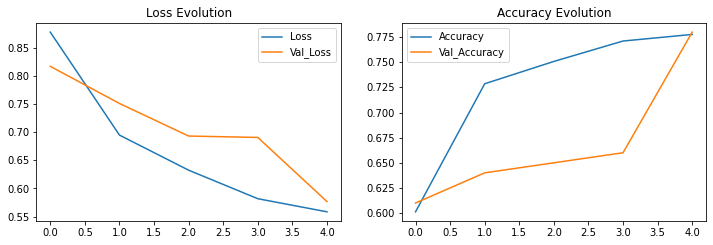

In [2]:
# TL Model
base_model = keras.applications.ResNet152(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**ResNet152V2**

Epoch 1/10
262/262 [==============================] - 110s 394ms/step - loss: 1.1115 - accuracy: 0.4756 - val_loss: 0.7760 - val_accuracy: 0.6600
Epoch 2/10
262/262 [==============================] - 105s 401ms/step - loss: 0.7592 - accuracy: 0.6895 - val_loss: 0.7531 - val_accuracy: 0.6400
Epoch 3/10
262/262 [==============================] - 106s 403ms/step - loss: 0.6627 - accuracy: 0.7368 - val_loss: 0.6530 - val_accuracy: 0.7300
Epoch 4/10
262/262 [==============================] - 101s 386ms/step - loss: 0.5897 - accuracy: 0.7777 - val_loss: 0.5773 - val_accuracy: 0.7600
Epoch 5/10
262/262 [==============================] - 103s 394ms/step - loss: 0.5574 - accuracy: 0.7807 - val_loss: 0.6507 - val_accuracy: 0.7200
Epoch 6/10
262/262 [==============================] - 100s 383ms/step - loss: 0.5222 - accuracy: 0.7976 - val_loss: 0.7187 - val_accuracy: 0.6800
Epoch 7/10
262/262 [==============================] - 99s 377ms/step - loss: 0.5291 - accuracy: 0.7831 - val_loss: 0.6342 - 

Text(0.5, 1.0, 'Accuracy Evolution')

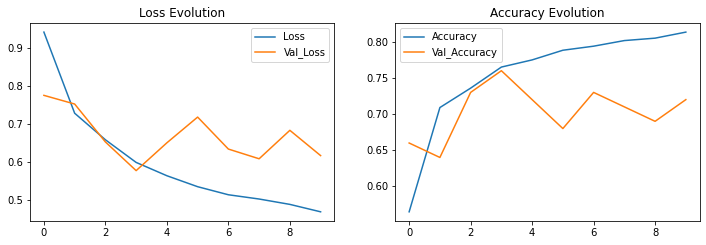

In [3]:
# TL Model
base_model = keras.applications.ResNet152(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**ResNet50V2**

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/5
262/262 [==============================] - 82s 302ms/step - loss: 1.0669 - accuracy: 0.4645 - val_loss: 0.7390 - val_accuracy: 0.7300
Epoch 2/5
262/262 [==============================] - 80s 305ms/step - loss: 0.7513 - accuracy: 0.7080 - val_loss: 0.7798 - val_accuracy: 0.5800
Epoch 3/5
262/262 [==============================] - 78s 298ms/step - loss: 0.6541 - accuracy: 0.7455 - val_loss: 0.6298 - val_accuracy: 0.7500
Epoch 4/5
262/262 [==============================] - 77s 293ms/step - loss: 0.5897 - accuracy: 0.7708 - val_loss: 0.5608 - val_accuracy: 0.7800
Epoch 5/5
2790/2790 [==============================] - 37s 13ms/step - loss: 0.6318 - accuracy: 0.7136


Text(0.5, 1.0, 'Accuracy Evolution')

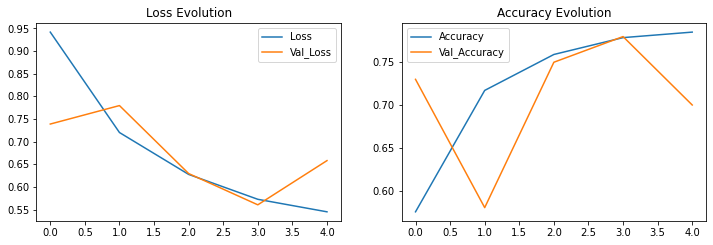

In [4]:
# TL Model
base_model = keras.applications.ResNet50(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
262/262 [==============================] - 77s 286ms/step - loss: 1.3014 - accuracy: 0.4630 - val_loss: 0.8085 - val_accuracy: 0.6200
Epoch 2/10
262/262 [==============================] - 75s 288ms/step - loss: 0.7496 - accuracy: 0.7253 - val_loss: 0.7012 - val_accuracy: 0.6900
Epoch 3/10
262/262 [==============================] - 74s 282ms/step - loss: 0.6436 - accuracy: 0.7555 - val_loss: 0.6485 - val_accuracy: 0.7300
Epoch 4/10
262/262 [==============================] - 77s 294ms/step - loss: 0.6052 - accuracy: 0.7526 - val_loss: 0.6167 - val_accuracy: 0.7300
Epoch 5/10
262/262 [==============================] - 72s 273ms/step - loss: 0.5614 - accuracy: 0.7753 - val_loss: 0.4558 - val_accuracy: 0.8300
Epoch 6/10
262/262 [==============================] - 74s 284ms/step - loss: 0.5266 - accuracy: 0.7920 - val_loss: 0.5072 - val_accuracy: 0.8100
Epoch 7/10
262/262 [==============================] - 75s 286ms/step - loss: 0.5067 - accuracy: 0.7944 - val_loss: 0.5784 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

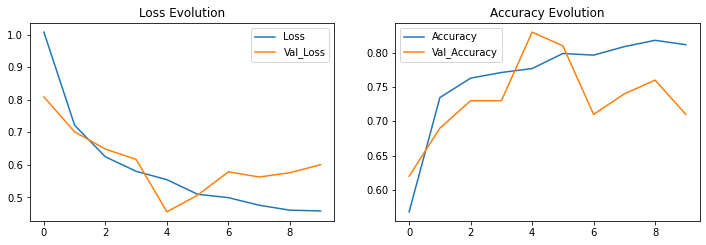

In [5]:
# TL Model
base_model = keras.applications.ResNet50(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**VGG16**

58892288/58889256 [==============================] - 1s 0us/step
Epoch 1/5
262/262 [==============================] - 87s 304ms/step - loss: 0.8088 - accuracy: 0.6666 - val_loss: 0.5299 - val_accuracy: 0.8300
Epoch 2/5
262/262 [==============================] - 73s 277ms/step - loss: 0.4118 - accuracy: 0.8633 - val_loss: 0.4132 - val_accuracy: 0.8600
Epoch 3/5
262/262 [==============================] - 71s 269ms/step - loss: 0.3359 - accuracy: 0.8857 - val_loss: 0.3912 - val_accuracy: 0.8200
Epoch 4/5
262/262 [==============================] - 67s 256ms/step - loss: 0.2792 - accuracy: 0.9056 - val_loss: 0.4132 - val_accuracy: 0.8400
Epoch 5/5
2790/2790 [==============================] - 30s 11ms/step - loss: 0.3846 - accuracy: 0.8505


Text(0.5, 1.0, 'Accuracy Evolution')

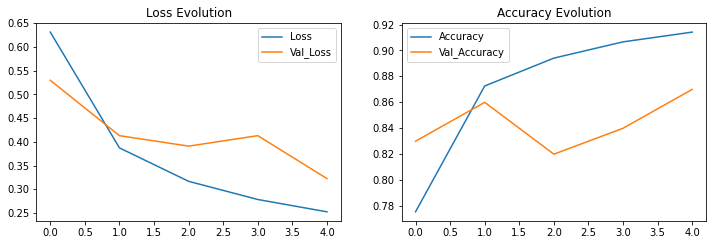

In [6]:
# TL Model
base_model = keras.applications.VGG16(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
262/262 [==============================] - 72s 272ms/step - loss: 0.8511 - accuracy: 0.6532 - val_loss: 0.5414 - val_accuracy: 0.8000
Epoch 2/10
262/262 [==============================] - 69s 263ms/step - loss: 0.4420 - accuracy: 0.8462 - val_loss: 0.6214 - val_accuracy: 0.7200
Epoch 3/10
262/262 [==============================] - 68s 260ms/step - loss: 0.3396 - accuracy: 0.8880 - val_loss: 0.4489 - val_accuracy: 0.7800
Epoch 4/10
262/262 [==============================] - 70s 266ms/step - loss: 0.2873 - accuracy: 0.9028 - val_loss: 0.4407 - val_accuracy: 0.8300
Epoch 5/10
262/262 [==============================] - 70s 267ms/step - loss: 0.2717 - accuracy: 0.9031 - val_loss: 0.3649 - val_accuracy: 0.8700
Epoch 6/10
262/262 [==============================] - 70s 266ms/step - loss: 0.2413 - accuracy: 0.9174 - val_loss: 0.3908 - val_accuracy: 0.8700
Epoch 7/10
262/262 [==============================] - 67s 256ms/step - loss: 0.2309 - accuracy: 0.9182 - val_loss: 0.2897 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

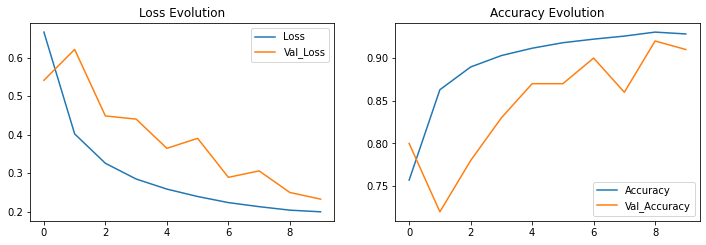

In [7]:
# TL Model
base_model = keras.applications.VGG16(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**DenseNet201**

74842112/74836368 [==============================] - 1s 0us/step
Epoch 1/5
262/262 [==============================] - 87s 290ms/step - loss: 0.8617 - accuracy: 0.7017 - val_loss: 0.4612 - val_accuracy: 0.8200
Epoch 2/5
262/262 [==============================] - 68s 259ms/step - loss: 0.2000 - accuracy: 0.9177 - val_loss: 0.4019 - val_accuracy: 0.8400
Epoch 3/5
262/262 [==============================] - 71s 270ms/step - loss: 0.1642 - accuracy: 0.9320 - val_loss: 0.2294 - val_accuracy: 0.9300
Epoch 4/5
262/262 [==============================] - 68s 258ms/step - loss: 0.1292 - accuracy: 0.9516 - val_loss: 0.3922 - val_accuracy: 0.9000
Epoch 5/5
2790/2790 [==============================] - 68s 24ms/step - loss: 0.2772 - accuracy: 0.8882


Text(0.5, 1.0, 'Accuracy Evolution')

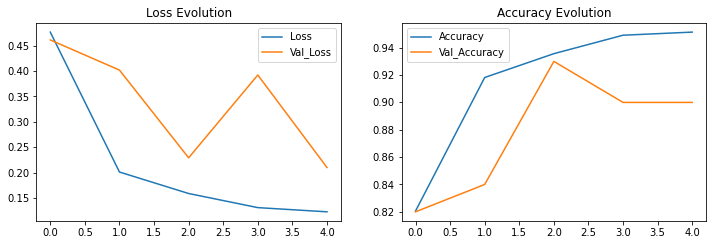

In [8]:
# TL Model
base_model = keras.applications.DenseNet201(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
262/262 [==============================] - 81s 278ms/step - loss: 0.7318 - accuracy: 0.7092 - val_loss: 0.4418 - val_accuracy: 0.8100
Epoch 2/10
262/262 [==============================] - 69s 263ms/step - loss: 0.2001 - accuracy: 0.9184 - val_loss: 0.3627 - val_accuracy: 0.8200
Epoch 3/10
262/262 [==============================] - 70s 268ms/step - loss: 0.1642 - accuracy: 0.9357 - val_loss: 0.3287 - val_accuracy: 0.8700
Epoch 4/10
262/262 [==============================] - 70s 267ms/step - loss: 0.1406 - accuracy: 0.9420 - val_loss: 0.1321 - val_accuracy: 0.9500
Epoch 5/10
262/262 [==============================] - 70s 267ms/step - loss: 0.1231 - accuracy: 0.9513 - val_loss: 0.4493 - val_accuracy: 0.8400
Epoch 6/10
262/262 [==============================] - 70s 266ms/step - loss: 0.1150 - accuracy: 0.9536 - val_loss: 0.2431 - val_accuracy: 0.9500
Epoch 7/10
262/262 [==============================] - 70s 266ms/step - loss: 0.1045 - accuracy: 0.9586 - val_loss: 0.1642 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

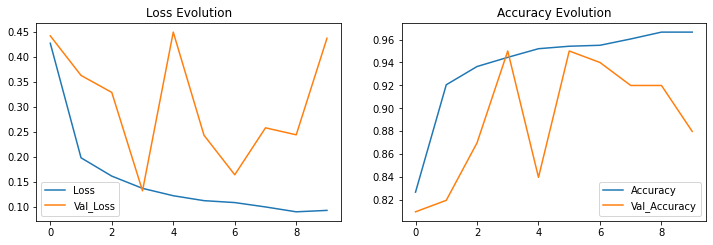

In [9]:
# TL Model
base_model = keras.applications.DenseNet201(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**InceptionResNetV2**

219062272/219055592 [==============================] - 2s 0us/step
Epoch 1/5
262/262 [==============================] - 87s 291ms/step - loss: 0.8831 - accuracy: 0.6766 - val_loss: 0.6187 - val_accuracy: 0.7500
Epoch 2/5
262/262 [==============================] - 74s 283ms/step - loss: 0.3549 - accuracy: 0.8533 - val_loss: 0.4390 - val_accuracy: 0.7900
Epoch 3/5
262/262 [==============================] - 73s 277ms/step - loss: 0.3072 - accuracy: 0.8716 - val_loss: 0.4186 - val_accuracy: 0.8300
Epoch 4/5
262/262 [==============================] - 73s 277ms/step - loss: 0.2896 - accuracy: 0.8828 - val_loss: 0.2946 - val_accuracy: 0.9100
Epoch 5/5
2790/2790 [==============================] - 82s 29ms/step - loss: 0.3859 - accuracy: 0.8444


Text(0.5, 1.0, 'Accuracy Evolution')

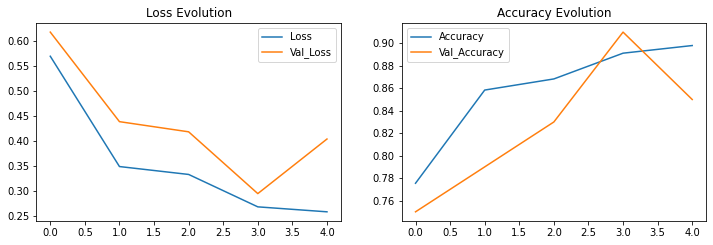

In [11]:
# TL Model
base_model = keras.applications.InceptionResNetV2(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
262/262 [==============================] - 86s 295ms/step - loss: 0.9258 - accuracy: 0.6799 - val_loss: 0.4159 - val_accuracy: 0.8300
Epoch 2/10
262/262 [==============================] - 71s 270ms/step - loss: 0.3503 - accuracy: 0.8548 - val_loss: 0.4919 - val_accuracy: 0.8000
Epoch 3/10
262/262 [==============================] - 74s 284ms/step - loss: 0.3065 - accuracy: 0.8762 - val_loss: 0.4405 - val_accuracy: 0.8300
Epoch 4/10
262/262 [==============================] - 73s 277ms/step - loss: 0.2658 - accuracy: 0.8954 - val_loss: 0.4138 - val_accuracy: 0.8400
Epoch 5/10
262/262 [==============================] - 70s 267ms/step - loss: 0.2424 - accuracy: 0.9021 - val_loss: 0.3635 - val_accuracy: 0.8800
Epoch 6/10
262/262 [==============================] - 72s 274ms/step - loss: 0.2346 - accuracy: 0.9040 - val_loss: 0.2876 - val_accuracy: 0.8700
Epoch 7/10
262/262 [==============================] - 71s 271ms/step - loss: 0.2423 - accuracy: 0.9062 - val_loss: 0.2195 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

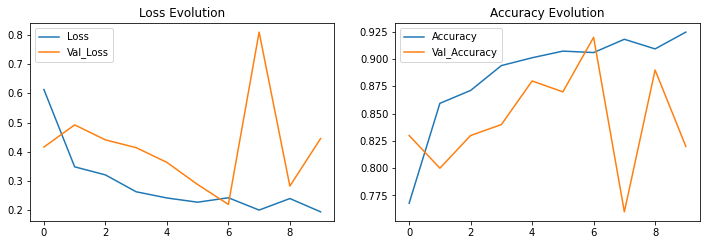

In [12]:
# TL Model
base_model = keras.applications.InceptionResNetV2(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**InceptionV3**

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/5
262/262 [==============================] - 2318s 9s/step - loss: 0.8292 - accuracy: 0.7075 - val_loss: 0.3646 - val_accuracy: 0.8600
Epoch 2/5
262/262 [==============================] - 87s 333ms/step - loss: 0.3185 - accuracy: 0.8703 - val_loss: 0.2839 - val_accuracy: 0.8900
Epoch 3/5
262/262 [==============================] - 86s 329ms/step - loss: 0.2969 - accuracy: 0.8748 - val_loss: 0.2800 - val_accuracy: 0.8600
Epoch 4/5
262/262 [==============================] - 84s 322ms/step - loss: 0.2304 - accuracy: 0.9068 - val_loss: 0.3847 - val_accuracy: 0.8300
Epoch 5/5
2790/2790 [==============================] - 746s 268ms/step - loss: 0.3209 - accuracy: 0.8706


Text(0.5, 1.0, 'Accuracy Evolution')

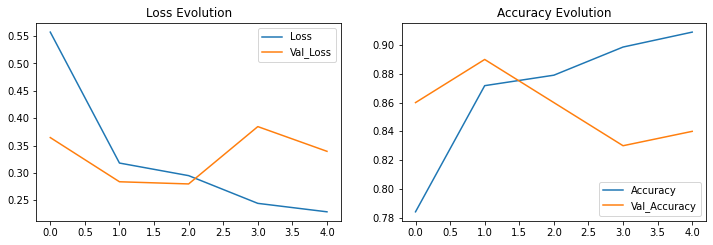

In [3]:
# TL Model
base_model = keras.applications.InceptionV3(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


87916544/87910968 [==============================] - 0s 0us/step
Epoch 1/10
262/262 [==============================] - 2053s 8s/step - loss: 0.8327 - accuracy: 0.6894 - val_loss: 0.6398 - val_accuracy: 0.7400
Epoch 2/10
262/262 [==============================] - 91s 346ms/step - loss: 0.3532 - accuracy: 0.8637 - val_loss: 0.3369 - val_accuracy: 0.8500
Epoch 3/10
262/262 [==============================] - 89s 339ms/step - loss: 0.2566 - accuracy: 0.8931 - val_loss: 0.5719 - val_accuracy: 0.8100
Epoch 4/10
262/262 [==============================] - 86s 329ms/step - loss: 0.2396 - accuracy: 0.9078 - val_loss: 0.4821 - val_accuracy: 0.8300
Epoch 5/10
262/262 [==============================] - 87s 332ms/step - loss: 0.2481 - accuracy: 0.9018 - val_loss: 0.3393 - val_accuracy: 0.8800
Epoch 6/10
262/262 [==============================] - 85s 325ms/step - loss: 0.1923 - accuracy: 0.9225 - val_loss: 0.3942 - val_accuracy: 0.8400
Epoch 7/10
262/262 [==============================] - 85s 326ms/st

Text(0.5, 1.0, 'Accuracy Evolution')

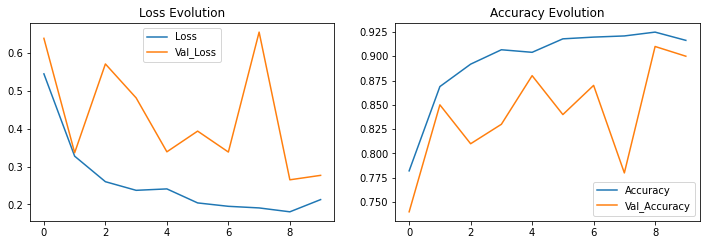

In [3]:
# TL Model
base_model = keras.applications.InceptionV3(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


**DenseNet121**

29089792/29084464 [==============================] - 0s 0us/step
Epoch 1/5
262/262 [==============================] - 95s 341ms/step - loss: 0.7985 - accuracy: 0.6919 - val_loss: 0.3190 - val_accuracy: 0.8500
Epoch 2/5
262/262 [==============================] - 88s 335ms/step - loss: 0.2734 - accuracy: 0.8867 - val_loss: 0.3188 - val_accuracy: 0.8700
Epoch 3/5
262/262 [==============================] - 87s 331ms/step - loss: 0.2250 - accuracy: 0.9084 - val_loss: 0.4242 - val_accuracy: 0.8700
Epoch 4/5
262/262 [==============================] - 85s 323ms/step - loss: 0.1974 - accuracy: 0.9240 - val_loss: 0.2283 - val_accuracy: 0.9100
Epoch 5/5
2790/2790 [==============================] - 60s 21ms/step - loss: 0.2734 - accuracy: 0.8946


Text(0.5, 1.0, 'Accuracy Evolution')

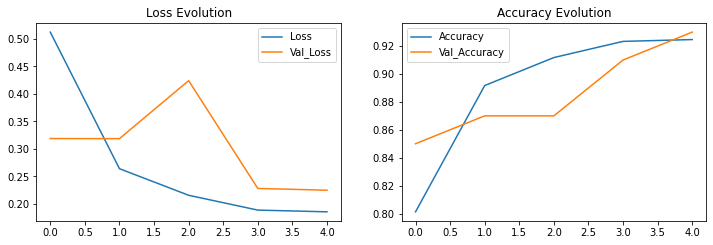

In [4]:
# TL Model
base_model = keras.applications.DenseNet121(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=5, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')


Epoch 1/10
262/262 [==============================] - 90s 324ms/step - loss: 1.4991 - accuracy: 0.5855 - val_loss: 0.6561 - val_accuracy: 0.8000
Epoch 2/10
262/262 [==============================] - 80s 307ms/step - loss: 0.3052 - accuracy: 0.8794 - val_loss: 0.2510 - val_accuracy: 0.9200
Epoch 3/10
262/262 [==============================] - 81s 308ms/step - loss: 0.2418 - accuracy: 0.9026 - val_loss: 0.2912 - val_accuracy: 0.9000
Epoch 4/10
262/262 [==============================] - 81s 311ms/step - loss: 0.1952 - accuracy: 0.9189 - val_loss: 0.3015 - val_accuracy: 0.8700
Epoch 5/10
262/262 [==============================] - 81s 308ms/step - loss: 0.1871 - accuracy: 0.9233 - val_loss: 0.4382 - val_accuracy: 0.8400
Epoch 6/10
262/262 [==============================] - 79s 300ms/step - loss: 0.1653 - accuracy: 0.9373 - val_loss: 0.2731 - val_accuracy: 0.9000
Epoch 7/10
262/262 [==============================] - 79s 300ms/step - loss: 0.1466 - accuracy: 0.9402 - val_loss: 0.3010 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

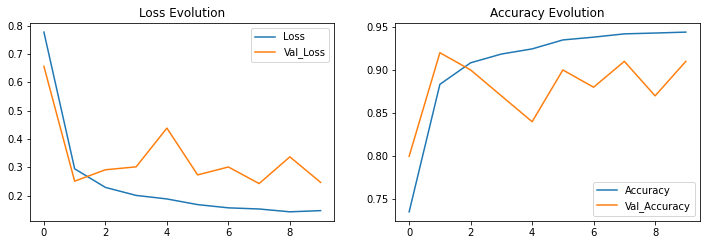

In [5]:
# TL Model
base_model = keras.applications.DenseNet121(
    include_top=False, weights='imagenet'
)

# changing the output layer of the TL layer
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(500, activation='relu')(x)
# x = Dense(100, activation='relu')(x)
predictions = Dense(X_train.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# model.summary()
model.compile(
    optimizer='adam',  # optimizer chooses the type of gradient descent one want to apply
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(X_train, epochs=10, validation_data=(
    Val_test), validation_steps = 100)

# evaluate on test set
model.evaluate(X_test)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
